In [1]:
import numpy as np
from skimage import io, util, measure, transform
from scipy.ndimage import gaussian_filter
from scipy import interpolate
import pandas as pd
from imageUtils import normalize_image_intensity_signed

from os import path
import stackview
import matplotlib.pyplot as plt
from scipy.interpolate import NearestNDInterpolator

from measurements import get_mesh_from_bm_image,get_tissue_curvatures, export_mesh
from trimesh import Trimesh
import pyvista as pv
pv.set_jupyter_backend('trame')

%load_ext autoreload
%autoreload 2


In [2]:
dirname = '/Users/xies/Library/CloudStorage/OneDrive-Stanford/Skin/Fixed/12-05-2025 Whole skin whole mount/Hoechst K10488 Phall594 Cdh5/3/'

im = io.imread(path.join(dirname,'3.tif'))
heightmap = io.imread(path.join(dirname,'heightmap.tif'))
k10 = im[...,1]

curvature = np.load(path.join(dirname,'interp_curve_grid.npz'),allow_pickle=True)['interp_curve_grid']

stackview.orthogonal(k10, zoom_factor=0.5,continuous_update=True)

In [3]:
k10_blur = gaussian_filter(k10,sigma=[1,5,5])
stackview.slice(k10_blur,zoom_factor=0.5)

In [9]:
k10.shape

(88, 1024, 1024)

In [49]:
# Construct slicer
Nslice = 20
k10_resliced = np.zeros((Nslice,*heightmap.shape),dtype=np.uint16)
for i in range(Nslice):
    _heightmap = np.clip(heightmap-20+i,a_min=0,a_max=k10.shape[0]-1)
    k10_resliced[i,:,:] = np.take_along_axis(k10, _heightmap[np.newaxis, :, :],axis=0)

io.imsave(path.join(dirname,'k10_resliced.tif'),k10_resliced)
stackview.slice(k10_resliced[:,500:,:500],zoom_factor=0.5)

/opt/miniconda3/envs/jupyter/lib/python3.12/site-packages/skimage/_shared/utils.py:328: UserWarning: /Users/xies/Library/CloudStorage/OneDrive-Stanford/Skin/Fixed/12-05-2025 Whole skin whole mount/Hoechst K10488 Phall594 Cdh5/3/k10_resliced.tif is a low contrast image
  return func(*args, **kwargs)


In [50]:
curvature[500:,:500]

array([[-0.65382818, -0.65382818, -0.65382818, ..., -0.08258189,
        -0.05662097, -0.05662097],
       [-0.65382818, -0.65382818, -0.65382818, ..., -0.08258189,
        -0.05662097, -0.05662097],
       [-0.65382818, -0.65382818, -0.65382818, ..., -0.08258189,
        -0.08258189, -0.05662097],
       ...,
       [-0.40557632, -0.40557632, -0.40557632, ...,  0.26907157,
         0.21325716,  0.21325716],
       [-0.40557632, -0.40557632, -0.40557632, ...,  0.21325716,
         0.21325716,  0.21325716],
       [-0.40557632, -0.40557632, -0.40557632, ...,  0.21325716,
         0.21325716,  0.21325716]])

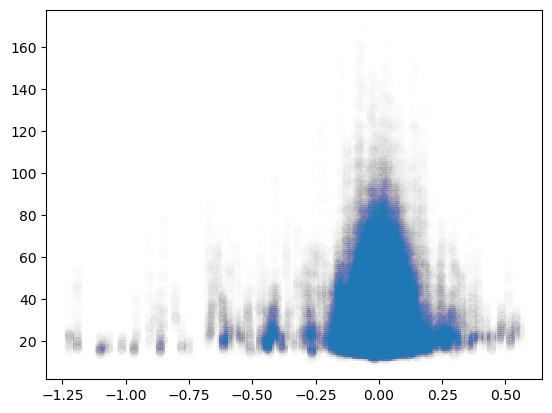

In [51]:
plt.scatter(curvature[500:,:500].flatten(),k10_resliced[:,500:,:500].max(axis=0).flatten(),alpha=0.005)


In [52]:
np.corrcoef(curvature.flatten(),k10_resliced.max(axis=0).flatten())

array([[1.       , 0.0091104],
       [0.0091104, 1.       ]])